# **I. INTRODUCTION**

Hello! Welcome to my Notebook.

Notebook ini merupakan bagian dari tugas *Milestone 1* yang dibuat oleh **Asta Zeska Dimitri** dari Batch **001-HCK**.

## I.1. THE DATA

Untuk data yang digunakan kali ini adalah data credit_card_default. Data ini tersedia di Google Cloud Platform dan merupakan bagian dari bigquery-public-data.ml_datasets. Untuk kolom tabel yang dipilih adalah limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month.

Tabel diambil dengan menggunakan kode query dibawah ini:

~~~sql
SELECT * EXCEPT (id, predicted_default_payment_next_month)
FROM `bigquery-public-data.ml_datasets.credit_card_default`
~~~

Kemudian disimpan dalam format (*.csv).

Keterangan setiap kolomnya:
- limit_balance: Amount of given credit in dollars (includes individual and family/supplementary credit
- sex: Gender (1=male, 2=female)
- education_level: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- marital_status: Marital status (1=married, 2=single, 3=others)
- age: Age in years
- pay_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- pay_2: Repayment status in August, 2005 (scale same as above)
- pay_3: Repayment status in July, 2005 (scale same as above)
- pay_4: Repayment status in June, 2005 (scale same as above)
- pay_5: Repayment status in May, 2005 (scale same as above)
- pay_6: Repayment status in April, 2005 (scale same as above)
- bill_amt_1: Amount of bill statement in September, 2005 (dollar)
- bill_amt_2: Amount of bill statement in August, 2005 (dollar)
- bill_amt_3: Amount of bill statement in July, 2005 (dollar)
- bill_amt_4: Amount of bill statement in June, 2005 (dollar)
- bill_amt_5: Amount of bill statement in May, 2005 (dollar)
- bill_amt_6: Amount of bill statement in April, 2005 (dollar)
- pay_amt_1: Amount of previous payment in September, 2005 (dollar)
- pay_amt_2: Amount of previous payment in August, 2005 (dollar)
- pay_amt_3: Amount of previous payment in July, 2005 (dollar)
- pay_amt_4: Amount of previous payment in June, 2005 (dollar)
- pay_amt_5: Amount of previous payment in May, 2005 (dollar)
- pay_amt_6: Amount of previous payment in April, 2005 (dollar)
- default_payment_next_month: Default payment (1=yes, 0=no)

## I.2.THE PROBLEM

Penulis ingin memprediksi nasabah mana yang memiliki kecenderungan untuk menunggak cicilan (default) pada bulan depan dengan menggunakan beberapa model machine learning classification untuk membantu proses analisisnya.

# **II. IMPORT LIBRARIES**

Memasukkan semua library yang akan digunakan dalam pengolahan data kali ini.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix

from feature_engine.outliers import Winsorizer 

# **III. DATA LOADING & OVERVIEW**

Memasukkan data yang akan digunakan dalam pengerjaan analisis kali ini sekaligus melakukan sedikit overview mengenai data yang digunakan.

In [4]:
df = pd.read_csv('h8dsft_P1M1_Asta_Dimitri.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [7]:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
5,20000,1,1,2,29,0,0,2,0,0,0,14897,17512,16926,17368,17959,19023,3170,0,1000,1000,3000,0,0
6,220000,1,1,2,38,0,0,0,0,0,0,209044,211453,217237,198681,202479,206221,7705,9656,7189,7404,7490,7517,0
7,50000,1,1,1,42,0,0,0,0,0,0,49887,49515,38680,29664,29057,29083,1850,1507,1100,1200,1116,2900,0
8,170000,1,1,1,41,0,0,0,0,0,0,149941,68912,72741,76149,84474,92400,3200,6000,5000,10000,10000,780,0
9,50000,2,1,2,24,0,0,2,0,0,0,52227,55264,52028,32140,32216,31482,5350,0,1085,2000,1226,2415,0


In [6]:
df.tail(3)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2962,80000,1,1,2,28,1,-1,-1,-1,-2,-2,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,-1,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1
2964,20000,2,1,2,24,-1,-1,-2,-2,-2,-2,379,0,0,0,0,0,0,0,0,0,0,0,0


Beberapa nama kolom masih bisa dipersingkat lagi, hal ini agar mempermudah proses pengerjaan kedepannya. Lalu kolom pay_0 memiliki penamaan yang berbeda sendiri jika dibandingkan dengan kolom bill_amt_x dan pay_amt_x, agar tidak menimbulkan kerancuan maka akan diubah sesuai dengan pola penamaan kolom yang lain.

In [7]:
df.rename(columns={'limit_balance': 'limit', 'education_level': 'education', 'marital_status': 'marriage', 'pay_0': 'pay_1', 'default_payment_next_month': 'default'}, inplace=True)

In [8]:
df.shape

(2965, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   limit       2965 non-null   int64
 1   sex         2965 non-null   int64
 2   education   2965 non-null   int64
 3   marriage    2965 non-null   int64
 4   age         2965 non-null   int64
 5   pay_1       2965 non-null   int64
 6   pay_2       2965 non-null   int64
 7   pay_3       2965 non-null   int64
 8   pay_4       2965 non-null   int64
 9   pay_5       2965 non-null   int64
 10  pay_6       2965 non-null   int64
 11  bill_amt_1  2965 non-null   int64
 12  bill_amt_2  2965 non-null   int64
 13  bill_amt_3  2965 non-null   int64
 14  bill_amt_4  2965 non-null   int64
 15  bill_amt_5  2965 non-null   int64
 16  bill_amt_6  2965 non-null   int64
 17  pay_amt_1   2965 non-null   int64
 18  pay_amt_2   2965 non-null   int64
 19  pay_amt_3   2965 non-null   int64
 20  pay_amt_4   2965 non-null   in

Tidak ditemukannya missing value null pada data.

In [10]:
df.describe()

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,-0.254637,52118.305228,50649.153120,48239.757504,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,1.167305,72328.670541,70785.001588,68145.710745,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3958.000000,3390.000000,3302.000000,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24257.000000,23111.000000,21520.000000,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69852.000000,67827.000000,63023.000000,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


Beberapa informasi yang bisa diambil dari statistik deskriptif diatas:
- ada nilai 0 pada kolom education, padahal berdasarkan keterangan kolom di atas nilainya hanya dari 1-6.
- ada nilai 0 juga pada kolom marriage, padahal berdasarkan keterangan kolom di atas nilainya hanya 1-3.
- ada nilai -2 dan 0 pada kolom pay_x yang juga tidak memiliki penjelasan pada keterangan kolom di atas.

In [11]:
df['education'].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education, dtype: int64

Berikut adalah keterangan untuk kolom education: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown.
Dapat dilihat bahwa nilai 5 dan 6 tidak memiliki informasi yang spesifik, dan nilai 0 tidak dijelaskan. Penulis memutuskan untuk menggabungkan nilai-nilai tersebut ke dalam kelompok others atau nilai 4.

In [12]:
df.loc[:, 'education'] = df.loc[:, 'education'].replace(0,4)
df.loc[:, 'education'] = df.loc[:, 'education'].replace(5,4)
df.loc[:, 'education'] = df.loc[:, 'education'].replace(6,4)
df['education'].value_counts()

2    1400
1    1039
3     483
4      43
Name: education, dtype: int64

In [13]:
df['marriage'].value_counts()

2    1594
1    1332
3      35
0       4
Name: marriage, dtype: int64

Berikut keterangan untuk kolom marriage: 1=married, 2=single, 3=others. Nilai 0 tidak dijelaskan dalam keterangan, maka penulis memutuskan untuk menggabungkan nilai 0 ke dalam kelompok others atau nomor 3.

In [14]:
df.loc[:, 'marriage'] = df.loc[:, 'marriage'].replace(0,3)
df['marriage'].value_counts()

2    1594
1    1332
3      39
Name: marriage, dtype: int64

In [15]:
df['pay_1'].value_counts()

 0    1516
-1     540
 1     356
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_1, dtype: int64

Berikut adalah keterangan untuk kolom pay_x: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months. Dapat terlihat bahwa kolom pay_x ini menunjukkan jumlah bulan yang ditunggak, 1 berarti menunggak 1 bulan, 2 berarti menunggak 2 bulan. Jadi menurut asumsi penulis, nilai -2, -1, dan 0 ini menunjukkan bahwa tidak ada penunggakan (pay duly), dan akan dikumpulkan ke satu kelompok dengan nilai 0.

In [16]:
df.loc[:, 'pay_1'] = df.loc[:, 'pay_1'].replace(-1,0)
df.loc[:, 'pay_1'] = df.loc[:, 'pay_1'].replace(-2,0)
df['pay_1'].value_counts()

0    2303
1     356
2     262
3      29
4       7
8       3
5       2
7       2
6       1
Name: pay_1, dtype: int64

In [17]:
df.loc[:, 'pay_2'] = df.loc[:, 'pay_2'].replace(-1,0)
df.loc[:, 'pay_2'] = df.loc[:, 'pay_2'].replace(-2,0)
df['pay_2'].value_counts()

0    2540
2     374
3      32
4       8
1       4
7       3
5       2
6       2
Name: pay_2, dtype: int64

In [18]:
df.loc[:, 'pay_3'] = df.loc[:, 'pay_3'].replace(-1,0)
df.loc[:, 'pay_3'] = df.loc[:, 'pay_3'].replace(-2,0)
df['pay_3'].value_counts()

0    2557
2     368
3      22
4       8
6       4
5       3
7       3
Name: pay_3, dtype: int64

In [19]:
df.loc[:, 'pay_4'] = df.loc[:, 'pay_4'].replace(-1,0)
df.loc[:, 'pay_4'] = df.loc[:, 'pay_4'].replace(-2,0)
df['pay_4'].value_counts()

0    2607
2     324
3      14
4       7
7       6
5       5
6       1
8       1
Name: pay_4, dtype: int64

In [20]:
df.loc[:, 'pay_5'] = df.loc[:, 'pay_5'].replace(-1,0)
df.loc[:, 'pay_5'] = df.loc[:, 'pay_5'].replace(-2,0)
df['pay_5'].value_counts()

0    2647
2     280
3      19
4       9
7       7
5       2
6       1
Name: pay_5, dtype: int64

In [21]:
df.loc[:, 'pay_6'] = df.loc[:, 'pay_6'].replace(-1,0)
df.loc[:, 'pay_6'] = df.loc[:, 'pay_6'].replace(-2,0)
df['pay_6'].value_counts()

0    2636
2     297
3      21
7       6
6       3
4       2
Name: pay_6, dtype: int64

# **IV. EXPLORATORY DATA ANALYSIS (EDA)**

Pada section ini kita akan mencoba melakukan eksplorasi pada data yang digunakan dengan harapan ada informasi/insight yang akan membantu dalam proses analisis selanjutnya.

## Kolom Target (default)

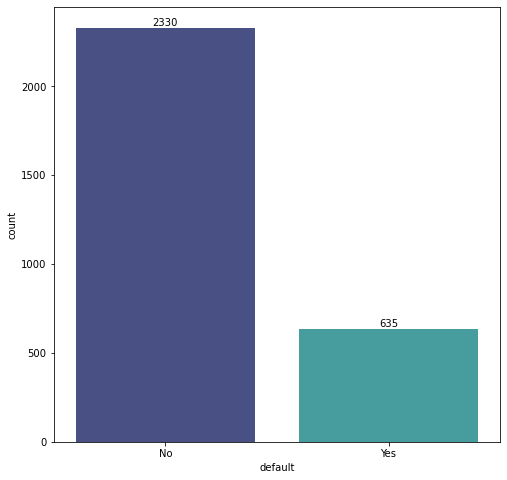

In [22]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df, x='default', palette='mako')
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks([0,1], ['No', 'Yes']);

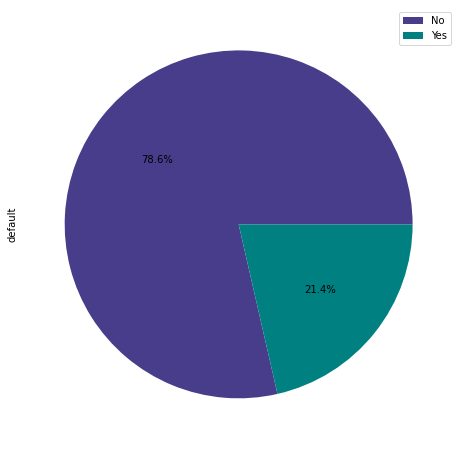

In [23]:
plt.figure(figsize=(8,8), facecolor='white')
df['default'].value_counts().plot(kind='pie', labels = ['',''], autopct='%1.1f%%', colors = ['darkslateblue','teal'])
plt.legend(labels=['No', 'Yes']);

Ketidakseimbangan pada kolom target (default) kita kali ini cukup signifikan. Dengan porsi 'No' sebesar 79% dan 'Yes' sebesar 21%.

## Kolom Features (sex)

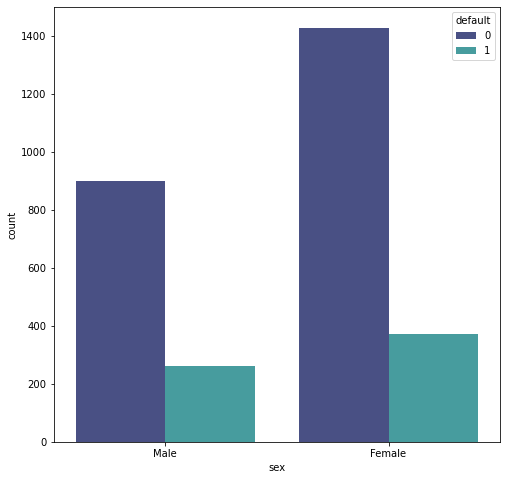

In [24]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='sex', hue='default', palette='mako')
plt.xticks([0,1], ['Male', 'Female']);

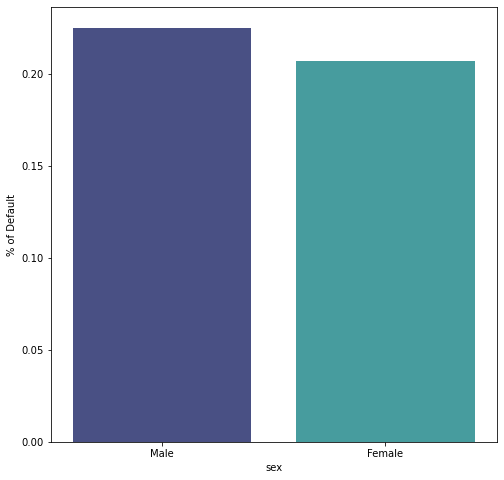

In [103]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='sex', y='default', palette='mako', ci=None)
plt.ylabel('% of Default')
plt.xticks([0,1], ['Male', 'Female']);

Disini kita coba melihat hubungan antara jenis kelamin dengan kecenderungan default-nya. Laki-laki lebih cenderung untuk melakukan default dibandingkan dengan perempuan.

## Kolom Features (education)

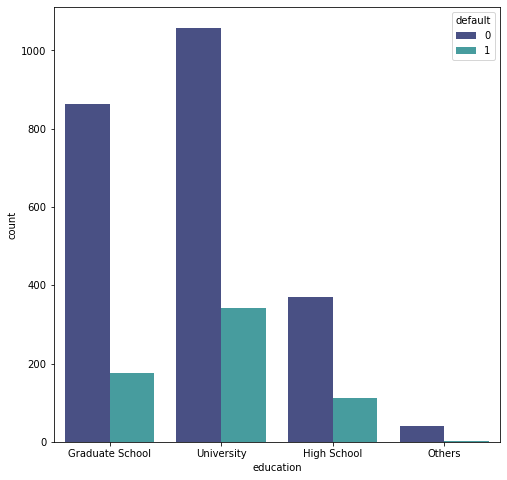

In [26]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='education', hue='default', palette='mako')
plt.xticks([0,1,2,3], ['Graduate School', 'University', 'High School', 'Others']);

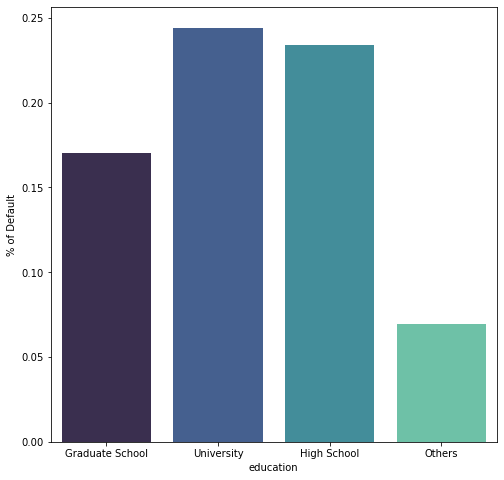

In [104]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='education', y='default', palette='mako', ci=None)
plt.ylabel('% of Default')
plt.xticks([0,1,2,3], ['Graduate School', 'University', 'High School', 'Others']);

Disini kita coba melihat hubungan antara tingkat pendidikan dengan kecenderungan untuk melakukan default. Ternyata lulusan high school dan university memiliki kecenderungan default yang lebih tinggi jika dibandingkan dengan yang lain. 

## Kolom Features (marriage)

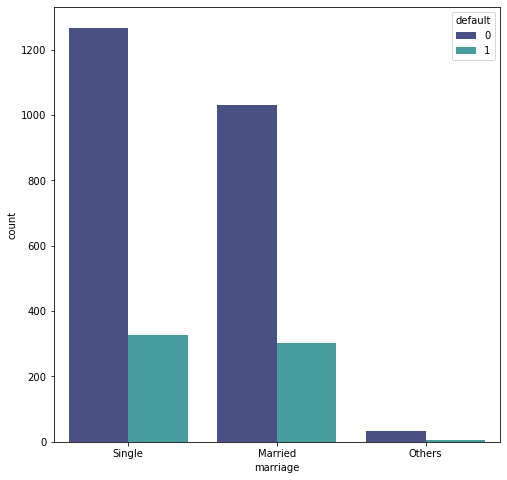

In [108]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='marriage', hue='default', palette='mako')
plt.xticks([0,1,2], ['Single', 'Married', 'Others']);

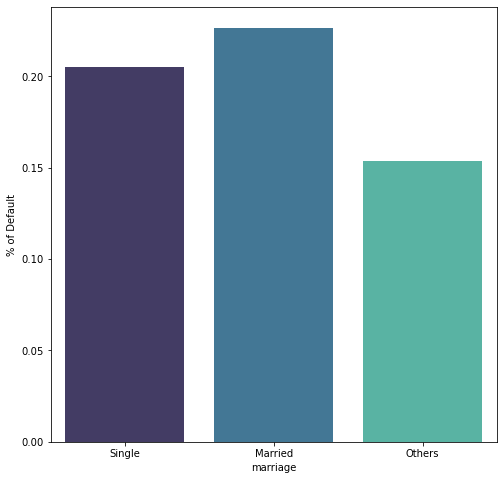

In [109]:
plt.figure(figsize=(8,8))
sns.barplot(data=df, x='marriage', y='default', palette='mako', ci=None)
plt.ylabel('% of Default')
plt.xticks([0,1,2], ['Single', 'Married', 'Others']);

Disini kita ingin melihat hubungan antara status pernikahan dengan kecenderungan untuk melakukan default. Ternyata yang memiliki kecenderungan untuk melakukan default adalah nasabah yang sudah menikah.

## Kolom Features (age)

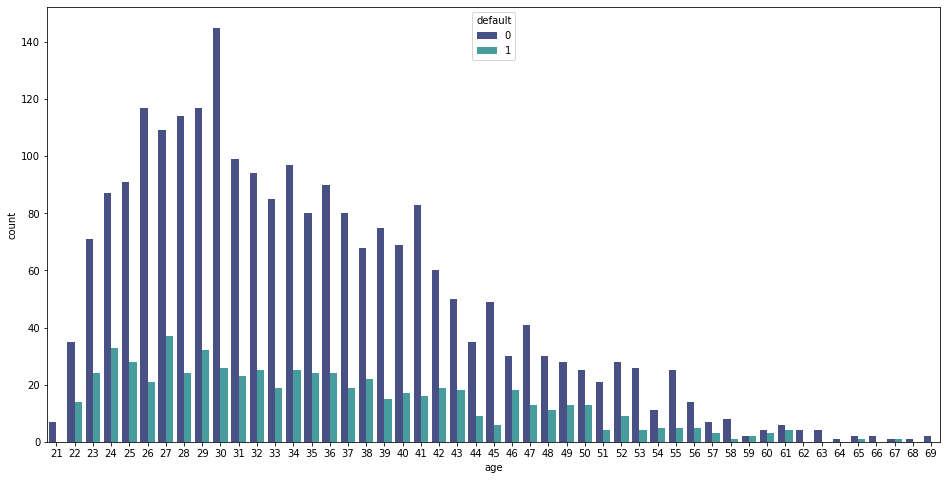

In [30]:
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='age', hue='default', palette='mako');

In [31]:
df_copy = df.copy()
df_copy['age_range'] = pd.cut(df_copy['age'], [20, 30, 40, 50, 60, 70])
df_copy['age_range'].value_counts()

(20, 30]    1132
(30, 40]    1050
(40, 50]     567
(50, 60]     187
(60, 70]      29
Name: age_range, dtype: int64

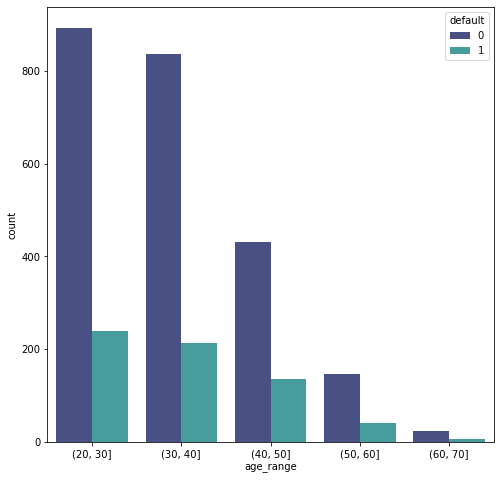

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(data=df_copy, x='age_range', hue='default', palette='mako');

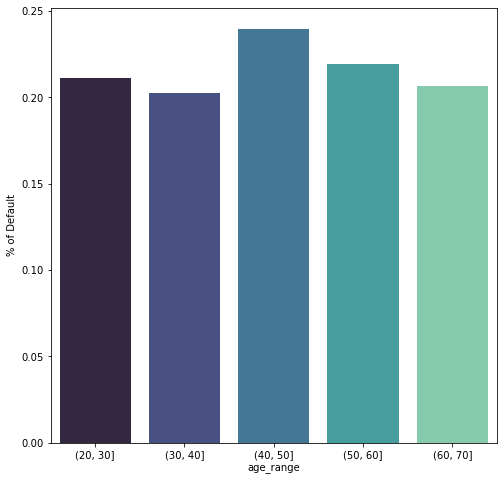

In [110]:
plt.figure(figsize=(8,8))
sns.barplot(data=df_copy, x='age_range', y='default', palette='mako', ci=None)
plt.ylabel('% of Default');

Disini kita ingin melihat apakah kecenderungan untuk melakukan default dipengaruhi oleh usia nasabah. Sebelum itu penulis memutuskan untuk membuat beberapa kelompok usia agar lebih mudah dalam pengambilan informasinya. Terlihat bahwa nasabah dengan kecenderungan melakukan default lebih tinggi adalah nasabah dengan usia 41-50 tahun.

## Kolom Features (limit)

In [34]:
df_copy['limit_range'] = pd.cut(df_copy['limit'],[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000])
print(df_copy['limit_range'].value_counts())

(0, 100000]         1254
(100000, 200000]     781
(200000, 300000]     522
(300000, 400000]     258
(400000, 500000]     136
(500000, 600000]       8
(600000, 700000]       3
(700000, 800000]       3
Name: limit_range, dtype: int64


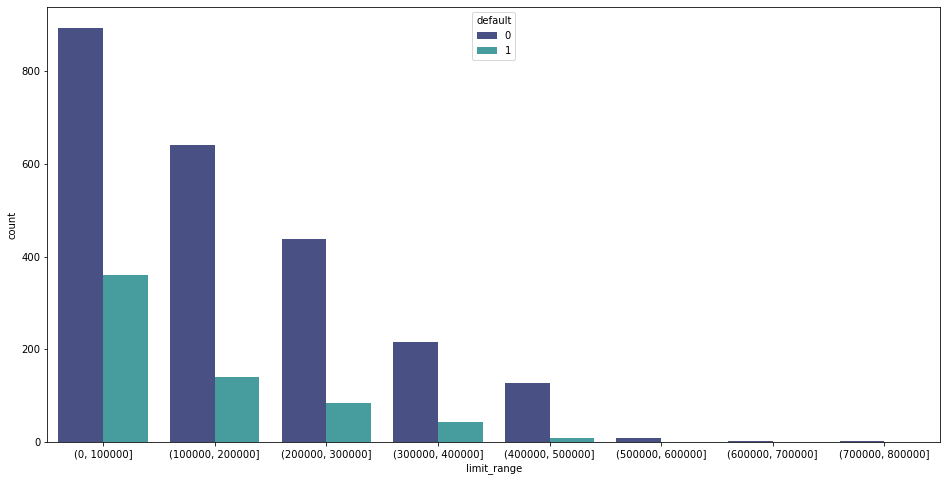

In [35]:
plt.figure(figsize=(16,8))
sns.countplot(data=df_copy, x='limit_range', hue='default', palette='mako');

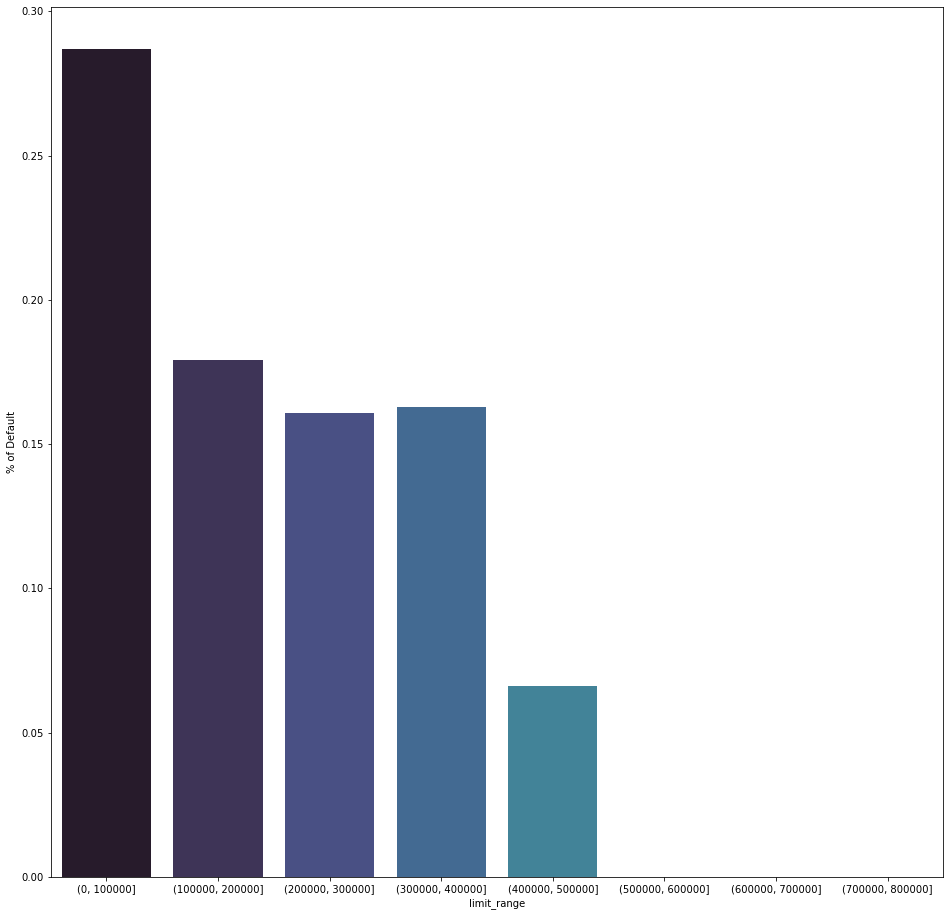

In [113]:
plt.figure(figsize=(16,16))
sns.barplot(data=df_copy, x='limit_range', y='default', palette='mako', ci=None)
plt.ylabel('% of Default');

Penulis juga ingin melihat apakah ada hubungan antara limit balance yang diberikan dengan kecenderungan untuk melakukan default. Disini penulis juga melakukan pengelompokkan dengan tujuan yang sama agar lebih mudah dalam pengambilan informasi. Terlihat bahwa nasabah-nasabah dengan limit balance yang rendah lebih tinggi kemungkinan melakukan default dibandingkan dengan nasabah-nasabah dengan limit balance yang tinggi.

## Kolom Features (pay_x)

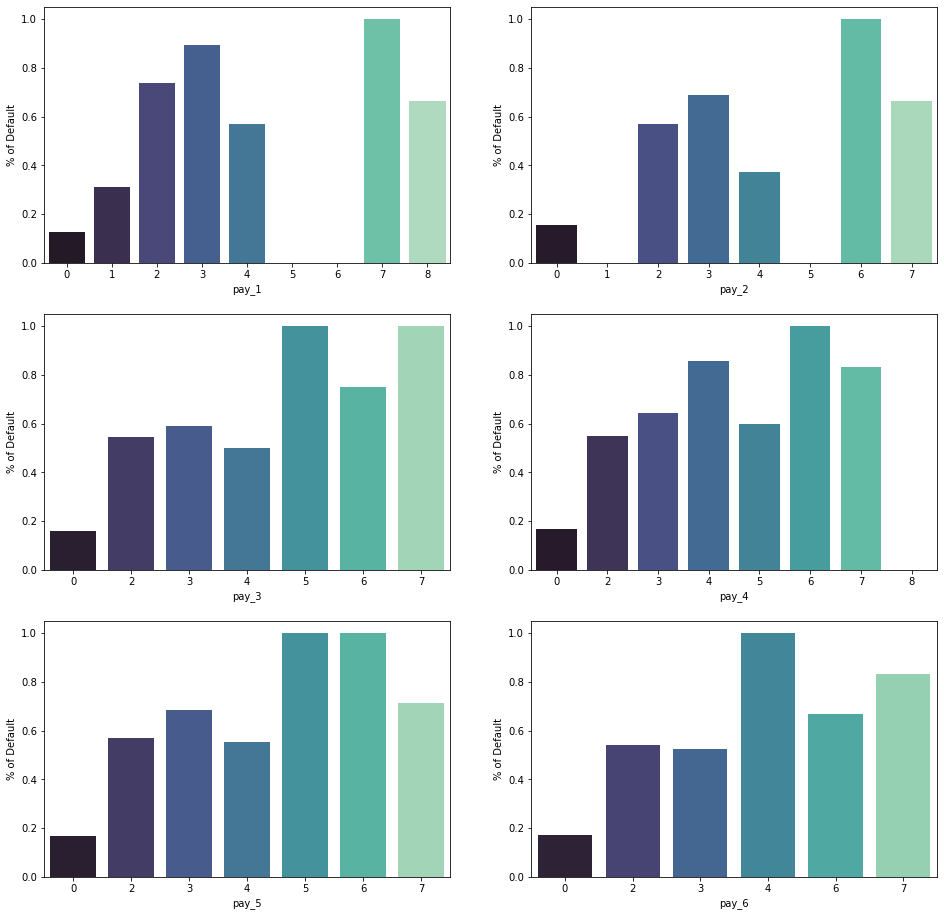

In [37]:
pay_x = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
plt.figure(figsize=(16,16))

for i, col in enumerate(pay_x):    
    plt.subplot(3, 2, i+1)
    sns.barplot(data=df, x=col, y='default', palette='mako', ci=None)
    plt.ylabel('% of Default');

Penulis ingin melihat apakah ada pengaruh antara status pembayaran tiap bulannya dengan kecenderungan melakukan default. Dapat terlihat dari enam grafik diatas memiliki kesamaan yaitu nasabah dengan status pembayaran tepat waktu (diwakili angka 0) paling rendah kecenderungan defaultnya dibandingkan dengan nasabah-nasabah yang memiliki tunggakan pembayaran. 

## Kolom Features (bill_amt_x)

In [38]:
bill_amt_x = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']
bill_range = ['bill_1_range', 'bill_2_range', 'bill_3_range', 'bill_4_range', 'bill_5_range', 'bill_6_range']

for i, col in enumerate (bill_range):
    df_copy[col] = pd.cut(df_copy[bill_amt_x[i]], [-150000, 0, 150000, 300000, 450000, 615000])
    print(df_copy[col].value_counts())

(0, 150000]         2435
(-150000, 0]         258
(150000, 300000]     230
(300000, 450000]      34
(450000, 615000]       8
Name: bill_1_range, dtype: int64
(0, 150000]         2406
(-150000, 0]         292
(150000, 300000]     226
(300000, 450000]      35
(450000, 615000]       6
Name: bill_2_range, dtype: int64
(0, 150000]         2391
(-150000, 0]         334
(150000, 300000]     199
(300000, 450000]      37
(450000, 615000]       4
Name: bill_3_range, dtype: int64
(0, 150000]         2401
(-150000, 0]         371
(150000, 300000]     168
(300000, 450000]      23
(450000, 615000]       2
Name: bill_4_range, dtype: int64
(0, 150000]         2375
(-150000, 0]         415
(150000, 300000]     158
(300000, 450000]      17
(450000, 615000]       0
Name: bill_5_range, dtype: int64
(0, 150000]         2358
(-150000, 0]         441
(150000, 300000]     151
(300000, 450000]      15
(450000, 615000]       0
Name: bill_6_range, dtype: int64


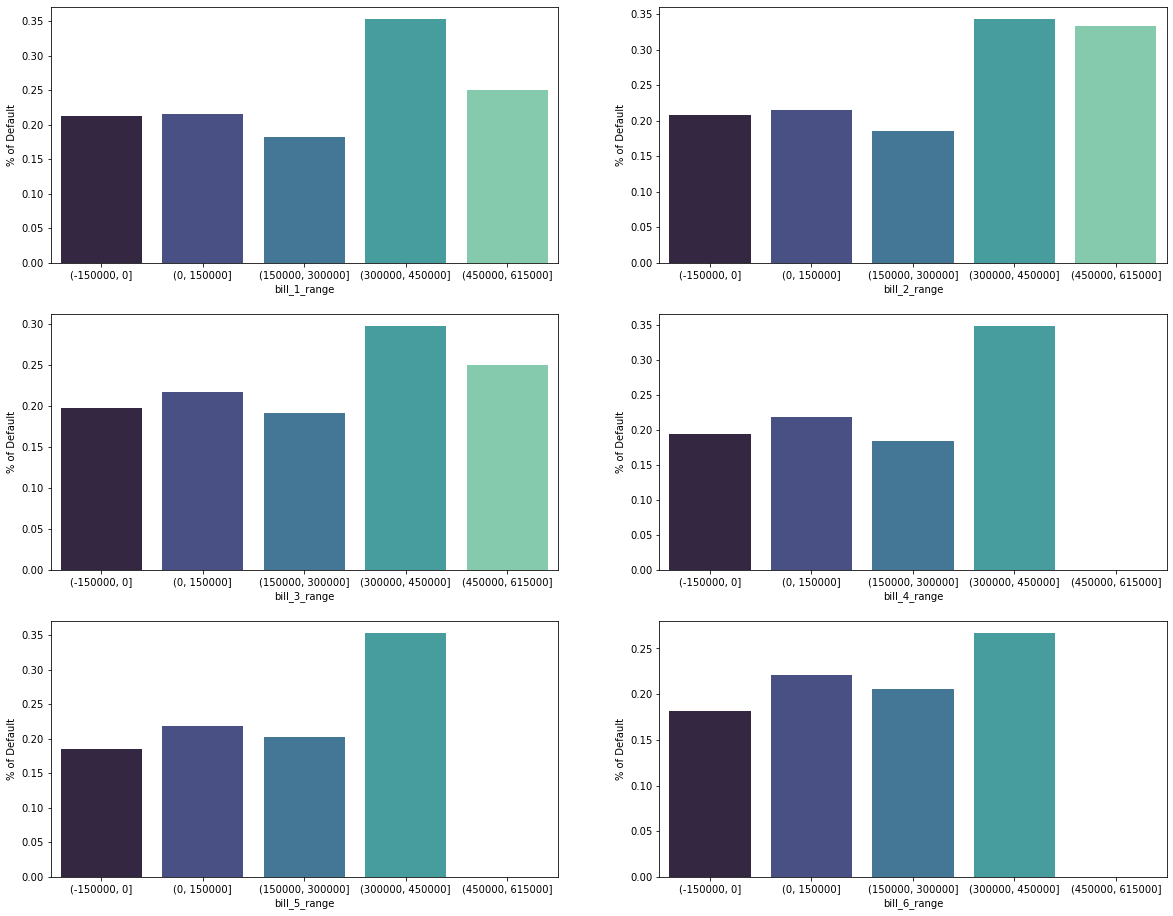

In [39]:
plt.figure(figsize=(20,16))

for i, col in enumerate(bill_range):    
    plt.subplot(3, 2, i+1)
    sns.barplot(data=df_copy, x=col, y='default', palette='mako', ci=None)
    plt.ylabel('% of Default');

Disini penulis ingin melihat hubungan antara jumlah tagihan dengan kecenderungan untuk melakukan default. Sebelumnya penulis mengelompokkan jumlah tagihan ini menjadi beberapa kelompok agar lebih mudah dilihat polanya. Seperti dugaan awal penulis, nasabah-nasabah dengan jumlah tagihan yang besar memang lebih cenderung untuk melakukan default jika dibandingkan dengan nasabah dengan jumlah tagihan yang lebih kecil.

## Kolom Features (pay_amt_x)

In [40]:
pay_amt_x = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
pay_range = ['pay_1_range', 'pay_2_range', 'pay_3_range', 'pay_4_range', 'pay_5_range', 'pay_6_range']

for i, col in enumerate (pay_range):
    df_copy[col] = pd.cut(df_copy[pay_amt_x[i]], [-1, 50000, 100000, 150000, 200000, 300000, 1250000])
    print(df_copy[col].value_counts())

(-1, 50000]          2908
(50000, 100000]        34
(100000, 150000]        9
(150000, 200000]        6
(200000, 300000]        6
(300000, 1250000]       2
Name: pay_1_range, dtype: int64
(-1, 50000]          2914
(50000, 100000]        32
(100000, 150000]       13
(300000, 1250000]       3
(200000, 300000]        2
(150000, 200000]        1
Name: pay_2_range, dtype: int64
(-1, 50000]          2922
(50000, 100000]        27
(150000, 200000]        9
(100000, 150000]        7
(200000, 300000]        0
(300000, 1250000]       0
Name: pay_3_range, dtype: int64
(-1, 50000]          2927
(50000, 100000]        22
(100000, 150000]        8
(150000, 200000]        7
(200000, 300000]        1
(300000, 1250000]       0
Name: pay_4_range, dtype: int64
(-1, 50000]          2924
(50000, 100000]        23
(100000, 150000]        8
(150000, 200000]        5
(200000, 300000]        4
(300000, 1250000]       1
Name: pay_5_range, dtype: int64
(-1, 50000]          2907
(50000, 100000]        38
(100000,

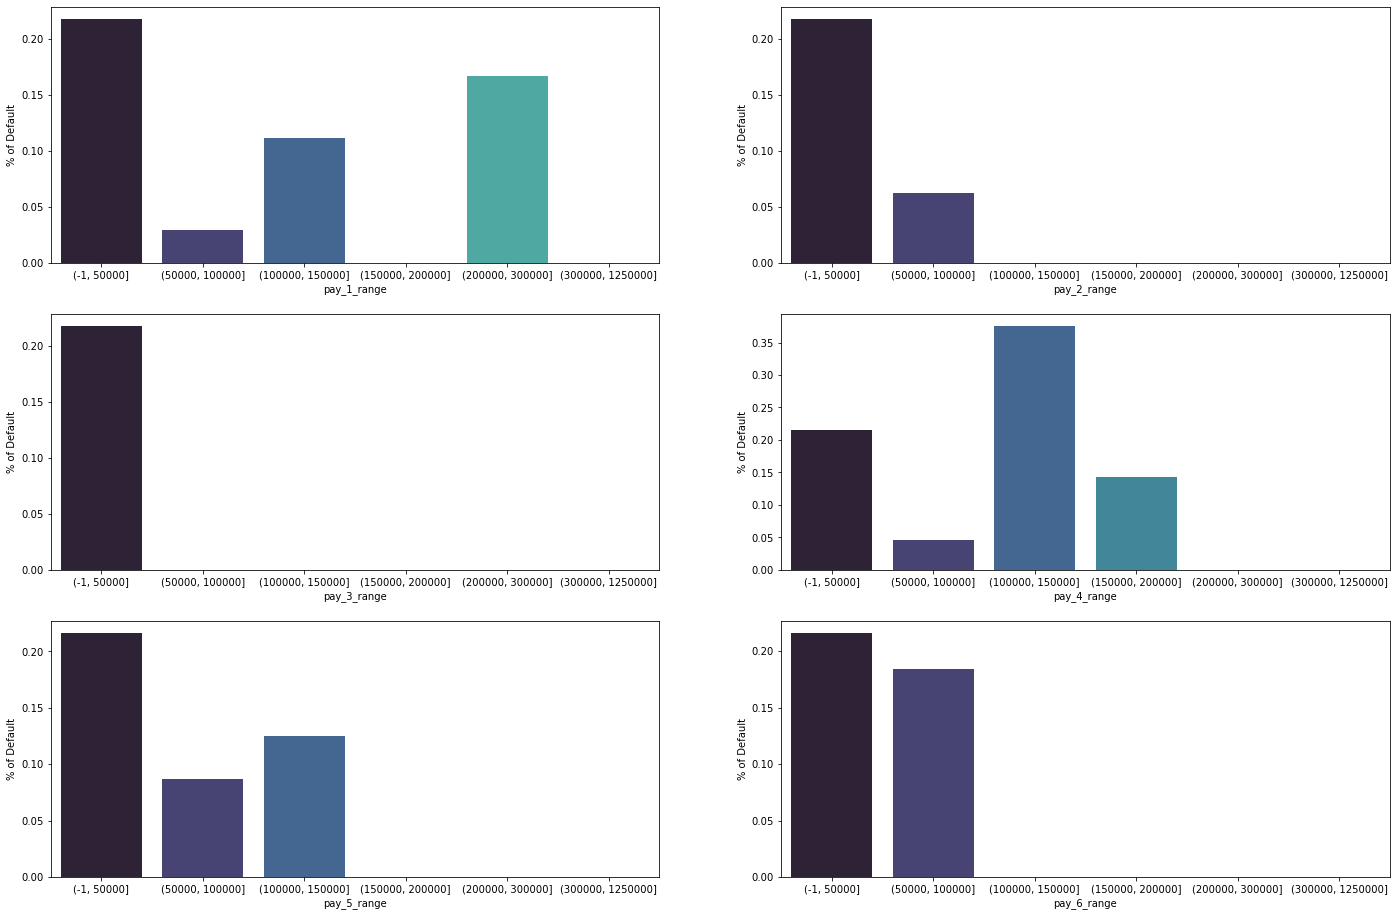

In [41]:
plt.figure(figsize=(24,16))

for i, col in enumerate(pay_range):    
    plt.subplot(3, 2, i+1)
    sns.barplot(data=df_copy, x=col, y='default', palette='mako', ci=None)
    plt.ylabel('% of Default');

Pada grafik diatas juga bisa dilihat hubungan antara jumlah pembayaran yang dilakukan nasabah dengan kecenderungan melakukan default. Ini juga sesuai dengan dugaan dari penulis, dimana nasabah dengan kecenderungan default tinggi adalah nasabah yang tidak melakukan pembayaran atau jumlah pembayarannya kecil. Dan nasabah dengan pembayaran diatas 300.000 tidak pernah melakukan default.

# **V. DATA PRE-PROCESSING**

Mengubah tipe kolom yang terlihat seperti numerik namun sebenarnya kategorikal.

In [42]:
df['sex'] = df['sex'].apply(str)
df['education'] = df['education'].apply(str)
df['marriage'] = df['marriage'].apply(str)
df['pay_1'] = df['pay_1'].apply(str)
df['pay_2'] = df['pay_2'].apply(str)
df['pay_3'] = df['pay_3'].apply(str)
df['pay_4'] = df['pay_4'].apply(str)
df['pay_5'] = df['pay_5'].apply(str)
df['pay_6'] = df['pay_6'].apply(str)

## Pemisahan Data Inference

In [43]:
data_inf = df.sample(5, random_state=39)
data_inf

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
1453,300000,2,2,1,46,0,0,0,0,0,0,5287,5750,2977,4796,2367,7367,3000,3000,2500,2367,5000,3000,0
2384,50000,1,2,1,50,1,1,0,0,0,0,36750,0,0,0,0,0,5000,0,0,0,0,0,0
94,30000,2,2,2,24,0,0,0,0,0,0,23729,27889,29500,29639,27546,6718,10000,2061,1200,551,0,0,1
1029,60000,2,2,1,37,0,0,0,0,0,0,38670,37606,35189,31373,28455,26598,1606,1674,1420,937,1006,1039,0
1153,20000,1,4,2,21,0,0,0,0,0,0,13203,4443,3259,2969,0,0,1036,1132,2000,0,0,0,0


In [44]:
data_train_test = df.drop(data_inf.index)
data_train_test

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,0,0,0,0,0,0,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,0,0,0,0,0,280,6852,486,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,0,0,0,0,0,0,47,207,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,0,0,0,0,0,0,2920,0,0,0,6753,2920,0,0,0,6753,0,1


In [45]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

## Pemisahan Data Train dan Test

In [46]:
X = data_train_test.drop(columns='default', axis=1)
y = data_train_test['default']
X

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,50000,1,1,2,39,0,0,0,0,0,0,47174,47974,48630,50803,30789,15874,1800,2000,3000,2000,2000,2000
1,110000,2,1,2,29,0,0,0,0,0,0,48088,45980,44231,32489,26354,20221,2000,2010,3000,3000,3000,1000
2,270000,1,1,2,36,0,0,0,2,0,0,78630,68921,46512,40335,37165,22156,10076,4018,14,2051,2000,0
3,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
4,50000,1,1,2,24,0,0,0,0,0,0,42058,35340,22110,19837,19855,20151,1367,1606,692,709,721,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,210000,2,2,1,39,0,0,0,0,0,0,44100,0,28428,0,0,12000,0,28428,0,0,12000,33664
2956,280000,2,1,1,41,2,0,0,0,0,0,280,6852,486,0,0,244,6859,486,0,0,244,0
2957,80000,1,1,2,28,1,0,0,0,0,0,0,47,207,0,0,0,47,207,0,0,0,0
2958,200000,1,2,1,53,1,0,0,0,0,0,0,2920,0,0,0,6753,2920,0,0,0,6753,0


In [47]:
train, test = train_test_split(data_train_test, test_size=0.15, stratify=y, random_state=39)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (2516, 24)
Test size:  (444, 24)


## Feature Selection

interval columns not set, guessing: ['limit', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default']


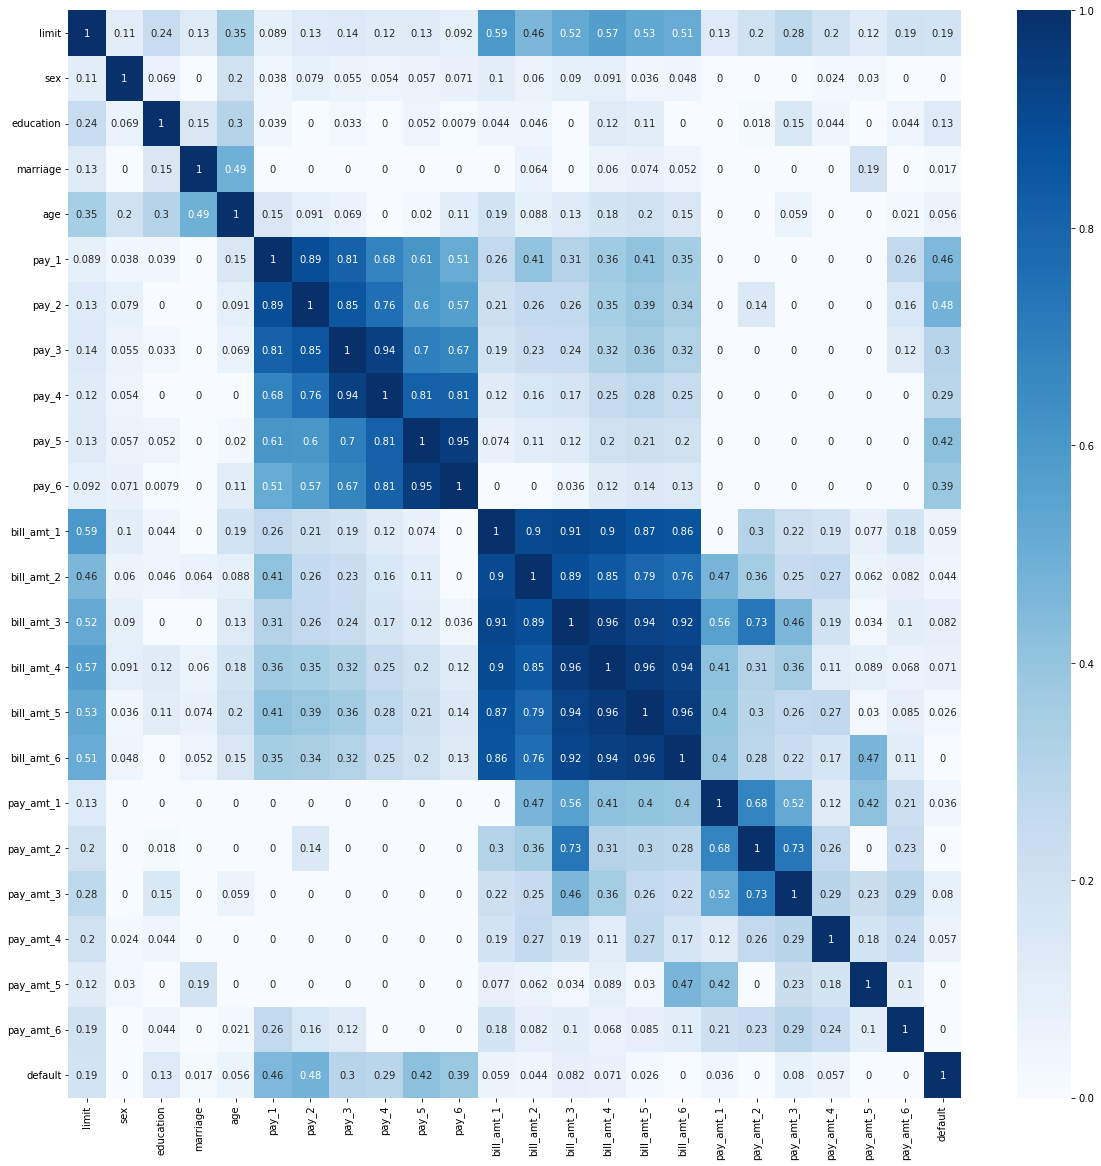

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(train.phik_matrix(), vmin=0, vmax=1, annot=True, cmap='Blues');

Disini penulis memutuskan tidak akan menggunakan kolom bill_amt_x, dan pay_amt_x. Untuk kolom bill_amt_x dan pay_amt_x menurut penulis selain nilai korelasinya yang mendekati 0, kedua kolom ini juga sudah diwakili oleh kolom pay_x karena kolom pay_x disini adalah status pembayaran. Lalu untuk kolom yang digunakan sebagai feature adalah limit, sex, education, marriage, age, pay_1, pay_2, pay_3, pay_4, pay_5, dan pay_6 karena dari EDA yang sudah dilakukan diatas bisa terlihat adanya hubungan antara kolom-kolom tersebut dengan kolom target.

In [49]:
train.drop(columns=['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], inplace=True)
test.drop(columns=['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'], inplace=True)
train

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,default
2088,150000,2,1,2,35,0,0,0,0,0,0,0
2836,130000,2,2,2,28,0,0,0,0,0,0,0
2467,200000,2,2,1,35,1,0,0,2,0,0,0
2034,230000,2,1,2,37,1,0,0,0,0,2,0
2429,200000,1,2,1,39,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
61,180000,2,2,1,34,0,0,0,0,0,0,0
509,360000,1,1,1,46,0,0,0,0,0,0,1
393,30000,2,3,2,35,0,0,0,0,0,0,0
2340,220000,2,1,1,43,0,3,2,0,0,0,1


## Handling Outliers

Dari feature yang sudah terpilih diatas, kita masih memiliki 2 kolom dengan tipe numerik, sehingga perlu dilakukan pengecekan dan handling outlier terlebih dahulu pada data train.

Nilai Skewness limit:  0.9724457598434526
Nilai Skewness age:  0.7825592611830096


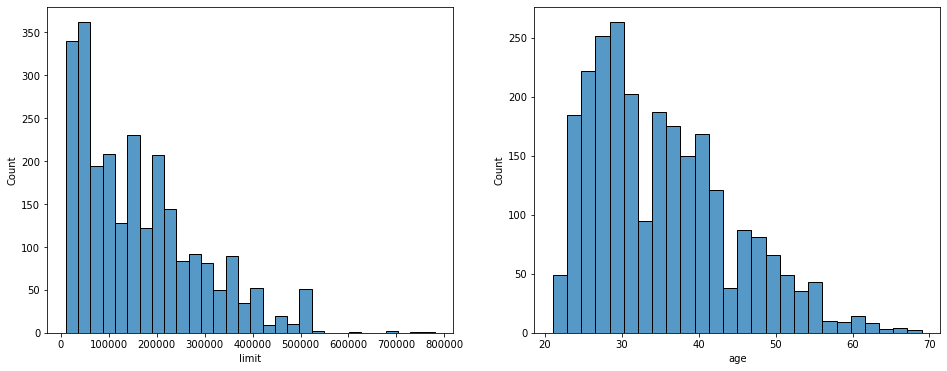

In [50]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.histplot(train['limit'])
plt.subplot(1, 2, 2)
sns.histplot(train['age']);

print('Nilai Skewness limit: ', train['limit'].skew())
print('Nilai Skewness age: ', train['age'].skew())

Distribusi data kedua kolom numerik ini termasuk mild skew dengan nilai skewness lebih dari 0.5 namun kurang dari 1. Untuk handling outliernya akan digunakan metode Tukey's Rule dengan konstanta 1.5

In [51]:
def find_skew_bound(data, feature, cons):
    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)

    lower_bound = data[feature].quantile(0.25) - (IQR * cons)
    upper_bound = data[feature].quantile(0.75) + (IQR * cons)

    return lower_bound, upper_bound

In [52]:
lower_bound, upper_bound = find_skew_bound(train, 'limit', 1.5)
lower_bound, upper_bound

print('Batas bawah limit:',lower_bound)
print('Batas atas limit:',upper_bound)
print('Jumlah outlier pada limit = {}'.format(len(train[train['limit'] > upper_bound])))
print('Persentase outlier pada limit = {:.2%}'.format(len(train[train['limit'] > upper_bound]) / len(train)))

Batas bawah limit: -220000.0
Batas atas limit: 500000.0
Jumlah outlier pada limit = 10
Persentase outlier pada limit = 0.40%


In [53]:
lower_bound, upper_bound = find_skew_bound(train, 'age', 1.5)
lower_bound, upper_bound

print('Batas bawah age:',lower_bound)
print('Batas atas age:',upper_bound)
print('Jumlah outlier pada age = {}'.format(len(train[train['age'] > upper_bound])))
print('Persentase outlier pada age = {:.2%}'.format(len(train[train['age'] > upper_bound]) / len(train)))

Batas bawah age: 8.5
Batas atas age: 60.5
Jumlah outlier pada age = 26
Persentase outlier pada age = 1.03%


Setelah kita mengetahui jenis distribusi data dan batas-batas untuk outliernya, maka kita bisa melakukan handling yang tepat untuk outlier ini. Penulis memilih untuk menggunakan metode capping agar tidak ada data yang hilang lagi, walaupun secara persentase outliernya kecil.

In [54]:
capper = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['limit', 'age'])
capper.fit(train)
train_clean = capper.transform(train)

In [55]:
print('X_train - Sebelum Capping')
print(train.describe())
print('')
print('X_train - Setelah Capping')
print(train_clean.describe())

X_train - Sebelum Capping
               limit          age      default
count    2516.000000  2516.000000  2516.000000
mean   163775.834658    35.110890     0.214229
std    124740.573050     9.092152     0.410368
min     10000.000000    21.000000     0.000000
25%     50000.000000    28.000000     0.000000
50%    140000.000000    33.000000     0.000000
75%    230000.000000    41.000000     0.000000
max    780000.000000    69.000000     1.000000

X_train - Setelah Capping
               limit          age      default
count    2516.000000  2516.000000  2516.000000
mean   163330.683625    35.081479     0.214229
std    123163.226921     9.001210     0.410368
min     10000.000000    21.000000     0.000000
25%     50000.000000    28.000000     0.000000
50%    140000.000000    33.000000     0.000000
75%    230000.000000    41.000000     0.000000
max    500000.000000    60.500000     1.000000


Outliers pada kolom limit dan age sudah berhasil dihandling dengan menggunakan winsorizer, dapat dilihat dari perubahan nilai max sebelum dan sesudah handling.

## Split between Features and Target

Dari data train dan test yang sudah didapat, dilakukan pemisahan kembali antara kolom feature dan targetnya.

In [56]:
X_train = train_clean.drop(columns='default')
y_train = train_clean['default']

X_test = test.drop(columns='default')
y_test = test['default']

In [57]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Kolom numerikal:', num_columns)
print('Kolom kategorikal:', cat_columns)

Kolom numerikal: ['limit', 'age']
Kolom kategorikal: ['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [58]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## Feature Scaling

Dilakukan untuk kolom/feature dengan tipe numerikal. Tujuannya untuk menyamakan/menyeragamkan range masing-masing featurenya, agar model lebih mudah dalam mempelajari pola/pattern dari feature ini.

In [59]:
X_train_num

,limit,age
2088,150000.0,35.0
2836,130000.0,28.0
2467,200000.0,35.0
2034,230000.0,37.0
2429,200000.0,39.0
...,...,...
61,180000.0,34.0
509,360000.0,46.0
393,30000.0,35.0
2340,220000.0,43.0


Karena persebaran kedua data numeriknya adalah skew seperti yang terlihat pada bagian handling outlier, jadi untuk metode scaling yang digunakan adalah MinMaxScaler.

In [60]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.28571429, 0.35443038],
       [0.24489796, 0.17721519],
       [0.3877551 , 0.35443038],
       ...,
       [0.04081633, 0.35443038],
       [0.42857143, 0.55696203],
       [0.02040816, 0.10126582]])

In [61]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat], axis=1)

X_train_final

array([[0.28571428571428564, 0.35443037974683544, '2', ..., '0', '0',
        '0'],
       [0.24489795918367344, 0.17721518987341778, '2', ..., '0', '0',
        '0'],
       [0.38775510204081626, 0.35443037974683544, '2', ..., '2', '0',
        '0'],
       ...,
       [0.04081632653061225, 0.35443037974683544, '2', ..., '0', '0',
        '0'],
       [0.4285714285714285, 0.5569620253164558, '2', ..., '0', '0', '0'],
       [0.02040816326530612, 0.10126582278481022, '1', ..., '0', '0',
        '0']], dtype=object)

In [62]:
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.285714,0.35443,2,1,2,0,0,0,0,0,0
1,0.244898,0.177215,2,2,2,0,0,0,0,0,0
2,0.387755,0.35443,2,2,1,1,0,0,2,0,0
3,0.44898,0.405063,2,1,2,1,0,0,0,0,2
4,0.387755,0.455696,1,2,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2511,0.346939,0.329114,2,2,1,0,0,0,0,0,0
2512,0.714286,0.632911,1,1,1,0,0,0,0,0,0
2513,0.040816,0.35443,2,3,2,0,0,0,0,0,0
2514,0.428571,0.556962,2,1,1,0,3,2,0,0,0


In [63]:
y_train

2088    0
2836    0
2467    0
2034    0
2429    0
       ..
61      0
509     1
393     0
2340    1
490     0
Name: default, Length: 2516, dtype: int64

# **VI. MODELLING**

Pada bagian ini, penulis akan mencoba membuat beberapa model untuk melihat model mana yang memiliki performa terbaik untuk data ini. Model yang dibuat adalah Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, K-Nearest Neighbours, Naive Bayes, dan Gradient Boosting.

## VI.1. LOGISTIC REGRESSION

### VI.1.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [64]:
log_model = LogisticRegression(random_state=39)

### VI.1.b. MODEL TRAINING

In [65]:
log_model.fit(X_train_final, y_train)

LogisticRegression(random_state=39)

### VI.1.c. MODEL EVALUATION

In [66]:
skfold = StratifiedKFold(n_splits=10)
log_train_cross_val = cross_val_score(log_model, X_train_final, y_train, cv=skfold, scoring='accuracy')
log_test_cross_val = cross_val_score(log_model, X_test_final, y_test, cv=skfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(log_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(log_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(log_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(log_test_cross_val)))

Train Mean Accuracy: 0.825 | Train Std Accuracy: 0.015
Test Mean Accuracy: 0.856  | Test Std Accuracy: 0.058


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1977
           1       0.71      0.35      0.47       539

    accuracy                           0.83      2516
   macro avg       0.78      0.66      0.68      2516
weighted avg       0.82      0.83      0.81      2516



========== TEST ==========
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       349
           1       0.81      0.40      0.54        95

    accuracy                           0.85       444
   macro avg       0.83      0.69      0.72       444
weighted avg       0.85      0.85      0.83       444



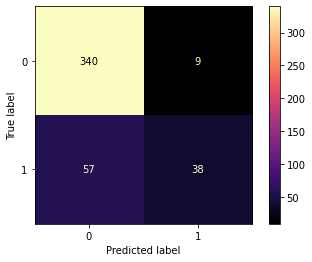

In [67]:
y_pred_train_log = log_model.predict(X_train_final)
y_pred_test_log = log_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_log, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_log, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_log, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Logistic Regression, didapatkan nilai recall sebesar 0.97 untuk label 0 (non-default) dan 0.4 untuk label 1 (default). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh nasabah non-default, model berhasil melakukan klasifikasi dengan tepat untuk 97% nasabah dan ada 3% nasabah non-default yang salah klasifikasi menjadi nasabah default.
- Dari seluruh nasabah default, model hanya berhasil melakukan klasifikasi dengan tepat untuk 40% nasabah saja. Berarti ada 60% nasabah default yang diklasifikasi model sebagai nasabah non-default.

## VI.2. SUPPORT VECTOR MACHINE (SVM)

### VI.2.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [68]:
svm_model = SVC(random_state=39)

### VI.2.b. MODEL TRAINING

In [69]:
svm_model.fit(X_train_final, y_train)

SVC(random_state=39)

### VI.2.c. MODEL EVALUATION

In [70]:
skfold = StratifiedKFold(n_splits=10)
svm_train_cross_val = cross_val_score(svm_model, X_train_final, y_train, cv=skfold, scoring='accuracy')
svm_test_cross_val = cross_val_score(svm_model, X_test_final, y_test, cv=skfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(svm_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(svm_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(svm_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(svm_test_cross_val)))

Train Mean Accuracy: 0.835 | Train Std Accuracy: 0.018
Test Mean Accuracy: 0.822  | Test Std Accuracy: 0.042


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1977
           1       0.74      0.42      0.54       539

    accuracy                           0.84      2516
   macro avg       0.80      0.69      0.72      2516
weighted avg       0.83      0.84      0.83      2516



========== TEST ==========
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       349
           1       0.77      0.46      0.58        95

    accuracy                           0.86       444
   macro avg       0.82      0.71      0.75       444
weighted avg       0.85      0.86      0.84       444



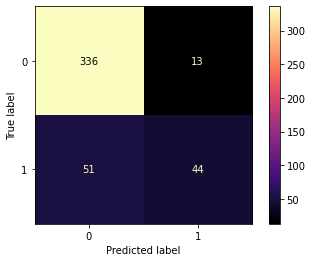

In [71]:
y_pred_train_svm = svm_model.predict(X_train_final)
y_pred_test_svm = svm_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_svm, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Support Vector Machine, didapatkan nilai recall sebesar 0.96 untuk label 0 (non-default) dan 0.46 untuk label 1 (default). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh nasabah non-default, model berhasil melakukan klasifikasi dengan tepat untuk 96% nasabah dan ada 4% nasabah non-default yang salah klasifikasi menjadi nasabah default.
- Dari seluruh nasabah default, model hanya berhasil melakukan klasifikasi dengan tepat untuk 46% nasabah saja. Berarti ada 54% nasabah default yang diklasifikasi model sebagai nasabah non-default.

Berdasarkan nilai recall-nya model Support Vector Machine menghasilkan nilai yang lebih baik apabila dibandingkan dengan model sebelummnya.

## VI.3. DECISION TREE

### VI.3.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [72]:
dt_model = DecisionTreeClassifier(random_state=39)

### VI.3.b. MODEL TRAINING

In [73]:
dt_model.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=39)

### VI.3.c. MODEL EVALUATION

In [74]:
skfold = StratifiedKFold(n_splits=10)
dt_train_cross_val = cross_val_score(dt_model, X_train_final, y_train, cv=skfold, scoring='accuracy')
dt_test_cross_val = cross_val_score(dt_model, X_test_final, y_test, cv=skfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(dt_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(dt_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(dt_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(dt_test_cross_val)))

Train Mean Accuracy: 0.745 | Train Std Accuracy: 0.021
Test Mean Accuracy: 0.766  | Test Std Accuracy: 0.096


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1977
           1       1.00      0.91      0.95       539

    accuracy                           0.98      2516
   macro avg       0.99      0.96      0.97      2516
weighted avg       0.98      0.98      0.98      2516



========== TEST ==========
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       349
           1       0.40      0.45      0.43        95

    accuracy                           0.74       444
   macro avg       0.62      0.63      0.63       444
weighted avg       0.75      0.74      0.74       444



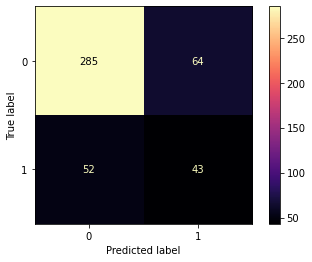

In [75]:
y_pred_train_dt = dt_model.predict(X_train_final)
y_pred_test_dt = dt_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_dt, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_dt, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_dt, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Decision Tree, didapatkan nilai recall sebesar 0.82 untuk label 0 (non-default) dan 0.45 untuk label 1 (default). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh nasabah non-default, model berhasil melakukan klasifikasi dengan tepat untuk 82% nasabah dan ada 18% nasabah non-default yang salah klasifikasi menjadi nasabah default.
- Dari seluruh nasabah default, model hanya berhasil melakukan klasifikasi dengan tepat untuk 45% nasabah saja. Berarti ada 55% nasabah default yang diklasifikasi model sebagai nasabah non-default.

Berdasarkan nilai recall-nya model Decision Tree ketepatannya tidak sebaik model SVM. terutama untuk klasifikasi nasabah non-default, model Decision Tree performanya tidak sebaik dua model sebelumnya.

## VI.4. RANDOM FOREST

### VI.4.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [76]:
rf_model = RandomForestClassifier(random_state=39)

### VI.4.b. MODEL TRAINING

In [77]:
rf_model.fit(X_train_final, y_train)

RandomForestClassifier(random_state=39)

### VI.4.c. MODEL EVALUATION

In [78]:
skfold = StratifiedKFold(n_splits=10)
rf_train_cross_val = cross_val_score(rf_model, X_train_final, y_train, cv=skfold, scoring='accuracy')
rf_test_cross_val = cross_val_score(rf_model, X_test_final, y_test, cv=skfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(rf_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(rf_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(rf_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(rf_test_cross_val)))

Train Mean Accuracy: 0.807 | Train Std Accuracy: 0.017
Test Mean Accuracy: 0.816  | Test Std Accuracy: 0.060


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1977
           1       0.98      0.93      0.95       539

    accuracy                           0.98      2516
   macro avg       0.98      0.96      0.97      2516
weighted avg       0.98      0.98      0.98      2516



========== TEST ==========
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       349
           1       0.60      0.42      0.49        95

    accuracy                           0.82       444
   macro avg       0.73      0.67      0.69       444
weighted avg       0.80      0.82      0.80       444



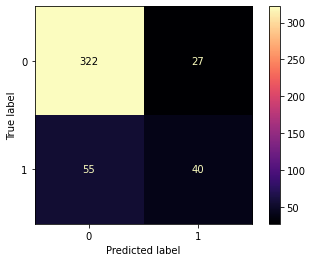

In [79]:
y_pred_train_rf = rf_model.predict(X_train_final)
y_pred_test_rf = rf_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_rf, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_rf, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Random Forest, didapatkan nilai recall sebesar 0.92 untuk label 0 (non-default) dan 0.42 untuk label 1 (default). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh nasabah non-default, model berhasil melakukan klasifikasi dengan tepat untuk 92% nasabah dan ada 8% nasabah non-default yang salah klasifikasi menjadi nasabah default.
- Dari seluruh nasabah default, model hanya berhasil melakukan klasifikasi dengan tepat untuk 42% nasabah saja. Berarti ada 58% nasabah default yang diklasifikasi model sebagai nasabah non-default.

Berdasarkan nilai recall-nya model Random Forest memiliki ketepatan yang lebih baik dibandingkan Decision tree terutama dalam klasifikasi nasabah non-default. Namun secara overall, model Random Forest performanya tidak sebaik SVM ataupun Logistic Regression.

## VI.5. K-NEAREST NEIGHBOURS (KNN)

### VI.5.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [80]:
knn_model = KNeighborsClassifier()

### VI.5.b. MODEL TRAINING

In [81]:
knn_model.fit(X_train_final, y_train)

KNeighborsClassifier()

### VI.5.c. MODEL EVALUATION

In [82]:
skfold = StratifiedKFold(n_splits=10)
knn_train_cross_val = cross_val_score(knn_model, X_train_final, y_train, cv=skfold, scoring='accuracy')
knn_test_cross_val = cross_val_score(knn_model, X_test_final, y_test, cv=skfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(knn_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(knn_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(knn_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(knn_test_cross_val)))

Train Mean Accuracy: 0.811 | Train Std Accuracy: 0.008
Test Mean Accuracy: 0.842  | Test Std Accuracy: 0.058


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1977
           1       0.73      0.47      0.57       539

    accuracy                           0.85      2516
   macro avg       0.80      0.71      0.74      2516
weighted avg       0.84      0.85      0.84      2516



========== TEST ==========
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       349
           1       0.65      0.42      0.51        95

    accuracy                           0.83       444
   macro avg       0.75      0.68      0.70       444
weighted avg       0.81      0.83      0.81       444



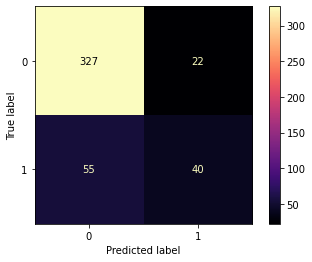

In [83]:
y_pred_train_knn = knn_model.predict(X_train_final)
y_pred_test_knn = knn_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_knn, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_knn, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_knn, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model KNN, didapatkan nilai recall sebesar 0.94 untuk label 0 (non-default) dan 0.42 untuk label 1 (default). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh nasabah non-default, model berhasil melakukan klasifikasi dengan tepat untuk 94% nasabah dan ada 6% nasabah non-default yang salah klasifikasi menjadi nasabah default.
- Dari seluruh nasabah default, model hanya berhasil melakukan klasifikasi dengan tepat untuk 42% nasabah saja. Berarti ada 58% nasabah default yang diklasifikasi model sebagai nasabah non-default.

Secara umum performa model KNN masih dibawah performa model SVM.

## VI.6. NAIVE BAYES

### VI.6.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [84]:
nb_model = GaussianNB()

### VI.6.b. MODEL TRAINING

In [85]:
nb_model.fit(X_train_final, y_train)

GaussianNB()

### VI.6.c. MODEL EVALUATION

In [86]:
skfold = StratifiedKFold(n_splits=10)
nb_train_cross_val = cross_val_score(nb_model, X_train_final, y_train, cv=skfold, scoring='accuracy')
nb_test_cross_val = cross_val_score(nb_model, X_test_final, y_test, cv=skfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(nb_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(nb_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(nb_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(nb_test_cross_val)))

Train Mean Accuracy: 0.808 | Train Std Accuracy: 0.029
Test Mean Accuracy: 0.822  | Test Std Accuracy: 0.056


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1977
           1       0.57      0.44      0.50       539

    accuracy                           0.81      2516
   macro avg       0.71      0.68      0.69      2516
weighted avg       0.80      0.81      0.80      2516



========== TEST ==========
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       349
           1       0.59      0.49      0.54        95

    accuracy                           0.82       444
   macro avg       0.73      0.70      0.71       444
weighted avg       0.81      0.82      0.81       444



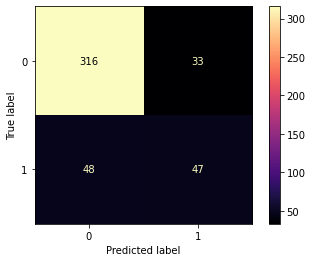

In [87]:
y_pred_train_nb = nb_model.predict(X_train_final)
y_pred_test_nb = nb_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_nb, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_nb, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_nb, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Naive Bayes, didapatkan nilai recall sebesar 0.91 untuk label 0 (non-default) dan 0.49 untuk label 1 (default). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh nasabah non-default, model berhasil melakukan klasifikasi dengan tepat untuk 91% nasabah dan ada 9% nasabah non-default yang salah klasifikasi menjadi nasabah default.
- Dari seluruh nasabah default, model hanya berhasil melakukan klasifikasi dengan tepat untuk 49% nasabah saja. Berarti ada 51% nasabah default yang diklasifikasi model sebagai nasabah non-default.

Nilai recall untuk nasabah default pada model Naive Bayes sejauh ini memiliki nilai yang paling tinggi jika dibandingkan dengan model lainnya.

## VI.7. GRADIENT BOOSTING

### VI.7.a. MODEL DEFINITION

Untuk pembuatan model awal ini digunakan hyperparameter default.

In [88]:
gb_model = GradientBoostingClassifier(random_state=39)

### VI.7.b. MODEL TRAINING

In [89]:
gb_model.fit(X_train_final, y_train)

GradientBoostingClassifier(random_state=39)

### VI.7.c. MODEL EVALUATION

In [90]:
skfold = StratifiedKFold(n_splits=10)
gb_train_cross_val = cross_val_score(gb_model, X_train_final, y_train, cv=skfold, scoring='accuracy')
gb_test_cross_val = cross_val_score(gb_model, X_test_final, y_test, cv=skfold, scoring='accuracy')

print(f'Train Mean Accuracy:','{:.3f}'.format(np.mean(gb_train_cross_val)), '| Train Std Accuracy:','{:.3f}'.format(np.std(gb_train_cross_val)))
print(f'Test Mean Accuracy:','{:.3f}'.format(np.mean(gb_test_cross_val)), ' | Test Std Accuracy:','{:.3f}'.format(np.std(gb_test_cross_val)))

Train Mean Accuracy: 0.833 | Train Std Accuracy: 0.016
Test Mean Accuracy: 0.829  | Test Std Accuracy: 0.043


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1977
           1       0.79      0.45      0.58       539

    accuracy                           0.86      2516
   macro avg       0.83      0.71      0.75      2516
weighted avg       0.85      0.86      0.84      2516



========== TEST ==========
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       349
           1       0.73      0.45      0.56        95

    accuracy                           0.85       444
   macro avg       0.80      0.70      0.73       444
weighted avg       0.84      0.85      0.83       444



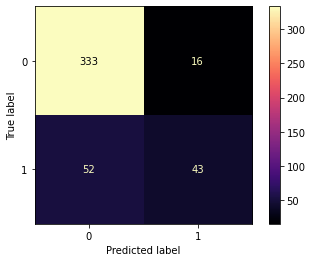

In [91]:
y_pred_train_gb = gb_model.predict(X_train_final)
y_pred_test_gb = gb_model.predict(X_test_final)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_gb, zero_division=0))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_gb, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_gb, labels=gb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)

disp.plot(cmap='magma')
plt.show()

Dari model Gradient Boosting, didapatkan nilai recall sebesar 0.95 untuk label 0 (non-default) dan 0.45 untuk label 1 (default). Nilai recall ini bisa diinterpretasikan sebagai:
- Dari seluruh nasabah non-default, model berhasil melakukan klasifikasi dengan tepat untuk 95% nasabah dan ada 5% nasabah non-default yang salah klasifikasi menjadi nasabah default.
- Dari seluruh nasabah default, model hanya berhasil melakukan klasifikasi dengan tepat untuk 45% nasabah saja. Berarti ada 55% nasabah default yang diklasifikasi model sebagai nasabah non-default.

Secara umum model Gradient Boosting memiliki nilai recall yang baik untuk kedua labelnya. Walaupun jika dilihat secara masing-masing nilai recallnya bukan yang paling tinggi jika dibandingkan dengan model lain, namun jika dilihat secara kesatuan, model Gradient Boosting inilah yang memiliki nilai recall yang paling baik.

## VI.8. MODEL OVERALL ANALYSIS

Disini penulis membuat sebanyak tujuh buah model dengan tujuan untuk mencari model mana yang performanya paling baik dalam melakukan prediksi nasabah yang akan menunggak/default. Metric yang akan menjadi patokan untuk pemilihan model terbaiknya adalah accuracy dan recall. Nilai accuracy disini digunakan bukan sebagai ukuran ketepatan sebuah model namun digunakan untuk melihat apakah model yang dibuat sudah fit atau ada kecenderungan untuk overfit atau underfit. Nilai recall menjadi metric yang penting dalam analisis kali ini, karena metric ini menunjukkan tingkat kesalahan klasifikasi atau yang sering disebut sebagai False Positive dan False Negative pada model.

Pada kasus kali ini sebagai pihak bank tentu saja kita tidak ingin sampai terjadi salah klasifikasi nasabah. Ketika ada nasabah yang default namun kita klasifikasi sebagai non-default (False Negatif), bank akan mengalami kerugian karena uang yang sudah dipinjamkan ke nasabah tidak akan kembali. Begitu juga sebaliknya, ketika ada nasabah non-default namun kita prediksi sebagai nasabah default (False Positive) kemudian kartu kreditnya kita bekukan/blokir, nasabah akan kecewa dan berhenti menggunakan produk kita yang artinya bank akan kehilangan customer.

Kembali ke model yang sudah dibuat, berikut adalah nilai accuracy dan recall dari tujuh model:

| Model                  | Train Accuracy | Test Accuaracy | Recall 0 Test | Recall 1 Test |
| :---                   |    :---:       |      :---:     |     :---:     |    :---:      |
| Logistic Regression    | 0.83 ± 0.02    | 0.86 ± 0.06    | 0.97          | 0.40          |
| Support Vector Machine | 0.84 ± 0.02    | 0.82 ± 0.04    | 0.96          | 0.46          |
| Decision Tree          | 0.75 ± 0.02    | 0.77 ± 0.10    | 0.82          | 0.45          |
| Random Forest          | 0.81 ± 0.02    | 0.82 ± 0.06    | 0.92          | 0.42          |
| K-Nearest Neighbours   | 0.81 ± 0.01    | 0.84 ± 0.06    | 0.94          | 0.42          |
| Naive Bayes            | 0.81 ± 0.03    | 0.82 ± 0.06    | 0.91          | 0.49          |
| Gradient Boosting      | 0.83 ± 0.02    | 0.83 ± 0.04    | 0.95          | 0.45          |

Secara umum semua model yang dibuat memiliki nilai accuracy data train dan test yang mirip atau bisa dikatakan model yang dibuat sudah fit, tidak cenderung overfit atau underfit. Lalu akibat pengaruh kolom target yang imbalance dimana porsi label 0 (non-default) jauh lebih besar dibandingkan label 1 (default), maka semua model memiliki nilai recall label non-default yang lebih tinggi dibandingkan dengan nilai recall label default.

Penulis memilih model **Gradient Boosting** sebagai model terbaik dibandingkan dengan model lainnya. Pemilihan model ini berdasarkan dari nilai recall untuk label non-default dan default yang cukup tinggi dibantu dengan nilai accuracy yang paling mirip antara data train dan test sebagai indikasi model ini fit, tidak cenderung overfit atau underfit.

Selanjutnya model yang sudah dipilih ini akan dilakukan improvement dengan mencari hyperparameter yang tepat menggunakan bantuan fungsi GridSearchCV. Harapannya setelah dilakukan improvement performa model akan semakin baik dibandingkan dengan model dengan parameter default.

# **VII. MODEL IMPROVEMENT**

## HYPERPARAMETER TUNING WITH GRIDSEARCH

Hyperparameter tuning bertujuan untuk mencari hyperparameter apa saja yang paling optimal untuk model yang digunakan. Untuk membantu mencari hyperparameter yang paling optimal digunakan bantuan dari fungsi GridSearchCV. GridSearchCV merupakan salah satu metode hyperparameter yang cukup sering digunakan, pada dasarnya cara kerja GridSearchCV ini adalah menjalankan semua kemungkinan kombinasi hyperparameter ke dalam model yang dibuat. Oleh karena itu salah satu kelemahan dari GridSearchCV ini adalah running timenya cenderung lebih lama jika dibandingkan dengan metode hyperparameter yang lain.

In [1]:
n_estimators = [80, 90, 100, 110]
learning_rate = [0.15, 0.2, 0.25]
max_depth = [1, 2, 3]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [2, 3, 4]
min_samples_leaf = [7, 8, 9]
gb_param_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': [39]}
gb_param_grid

{'n_estimators': [80, 90, 100, 110],
 'learning_rate': [0.15, 0.2, 0.25],
 'max_depth': [2, 3, 4],
 'max_features': ['sqrt', 'log2'],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [5, 6, 7],
 'random_state': [39]}

In [2]:
gb_gridcv = GridSearchCV(estimator=GradientBoostingClassifier(), 
                         param_grid=gb_param_grid,
                         cv=5,  
                         n_jobs=-1)
gb_gridcv.fit(X_train_final, y_train)

NameError: name 'GridSearchCV' is not defined

In [ ]:
gb_gridcv.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 90,
 'random_state': 39}

In [ ]:
gb_gridcv_best = gb_gridcv.best_estimator_

Accuracy - Before: 0.8468468468468469
Accuracy - After: 0.8513513513513513
========== TEST-BEFORE ==========
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       349
           1       0.73      0.45      0.56        95

    accuracy                           0.85       444
   macro avg       0.80      0.70      0.73       444
weighted avg       0.84      0.85      0.83       444

========== TEST-AFTER ==========
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       349
           1       0.74      0.47      0.58        95

    accuracy                           0.85       444
   macro avg       0.80      0.71      0.74       444
weighted avg       0.84      0.85      0.84       444



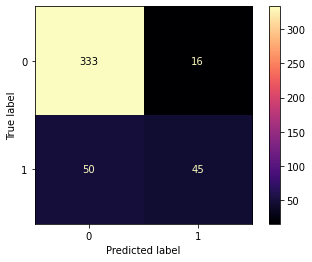

In [ ]:
y_pred_test_best = gb_gridcv_best.predict(X_test_final)
print('Accuracy - Before:', accuracy_score(y_test, y_pred_test_gb))
print('Accuracy - After:', accuracy_score(y_test, y_pred_test_best))

print("="*10,"TEST-BEFORE","="*10)
print(classification_report(y_test, y_pred_test_gb, zero_division=0))
print("="*10,"TEST-AFTER","="*10)
print(classification_report(y_test, y_pred_test_best, zero_division=0))

cm = confusion_matrix(y_test, y_pred_test_best, labels=gb_gridcv_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_gridcv_best.classes_)

disp.plot(cmap='magma')
plt.show()

Setelah dilakukan improvement dengan melakukan hyperparameter tuning menggunakan GridSearchCV terlihat adanya kenaikan performa walaupun tidak signifikan terutama untuk label 1 atau nasabah default. Bisa dilihat adanya kenaikan nilai precision, recall, dan f1 score. Untuk peningkatannya akan ditampilkan pada tabel di bawah.

| Metric    | Before      | After       |
|  :---     |  :----:     |    :----:   |
| Accuracy  |    0.846    |    0.851    |
| Precision | 0.86 & 0.73 | 0.87 & 0.74 |
| Recall    | 0.95 & 0.45 | 0.95 & 0.47 |
| F1 Score  | 0.91 & 0.56 | 0.91 & 0.58 |

# **VIII. MODEL INFERENCE**

Pada section ini akan dicoba untuk model memprediksi data inference atau data baru yang belum pernah dilihat sebelumnya.

In [ ]:
data_inf

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
0,300000,2,2,1,46,0,0,0,0,0,0,5287,5750,2977,4796,2367,7367,3000,3000,2500,2367,5000,3000,0
1,50000,1,2,1,50,1,1,0,0,0,0,36750,0,0,0,0,0,5000,0,0,0,0,0,0
2,30000,2,2,2,24,0,0,0,0,0,0,23729,27889,29500,29639,27546,6718,10000,2061,1200,551,0,0,1
3,60000,2,2,1,37,0,0,0,0,0,0,38670,37606,35189,31373,28455,26598,1606,1674,1420,937,1006,1039,0
4,20000,1,4,2,21,0,0,0,0,0,0,13203,4443,3259,2969,0,0,1036,1132,2000,0,0,0,0


In [ ]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

In [ ]:
data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_num_scaled

array([[0.59183673, 0.63291139],
       [0.08163265, 0.73417722],
       [0.04081633, 0.07594937],
       [0.10204082, 0.40506329],
       [0.02040816, 0.        ]])

In [ ]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat], axis=1)
data_inf_final

array([[0.5918367346938774, 0.6329113924050633, '2', '2', '1', '0', '0',
        '0', '0', '0', '0'],
       [0.08163265306122448, 0.7341772151898736, '1', '2', '1', '1', '1',
        '0', '0', '0', '0'],
       [0.04081632653061225, 0.07594936708860767, '2', '2', '2', '0',
        '0', '0', '0', '0', '0'],
       [0.10204081632653061, 0.40506329113924056, '2', '2', '1', '0',
        '0', '0', '0', '0', '0'],
       [0.02040816326530612, 0.0, '1', '4', '2', '0', '0', '0', '0', '0',
        '0']], dtype=object)

In [ ]:
y_pred_inf = gb_gridcv_best.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Predicted Default'])
y_pred_inf_df

,Predicted Default
0,0
1,0
2,0
3,0
4,0


In [ ]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,limit,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default,Predicted Default
0,300000,2,2,1,46,0,0,0,0,0,0,5287,5750,2977,4796,2367,7367,3000,3000,2500,2367,5000,3000,0,0
1,50000,1,2,1,50,1,1,0,0,0,0,36750,0,0,0,0,0,5000,0,0,0,0,0,0,0
2,30000,2,2,2,24,0,0,0,0,0,0,23729,27889,29500,29639,27546,6718,10000,2061,1200,551,0,0,1,0
3,60000,2,2,1,37,0,0,0,0,0,0,38670,37606,35189,31373,28455,26598,1606,1674,1420,937,1006,1039,0,0
4,20000,1,4,2,21,0,0,0,0,0,0,13203,4443,3259,2969,0,0,1036,1132,2000,0,0,0,0,0


Dilakukan pengujian ulang pada model menggunakan data inference/data baru yang belum pernah dilihat oleh model sebelumnya. Kita ingin melihat apakah model mampu melakukan klasifikasi untuk data baru ini. Disini model berhasil melakukan klasifikasi pada data baru, namun dari lima data yang diuji ditemukan adanya kesalahan dalam klasifikasi untuk label/kelas 1 (default). Hal ini wajar terjadi karena melihat dari performa model yang dibuat, model masih belum bisa mengklasifikasi label/kelas 1 (default) dengan baik.

# **IX. CONCLUSIONS**

Penulis sudah berhasil membuat beberapa model machine learning yang bertujuan untuk membantu perusahaan dalam melakukan klasifikasi nasabah default dan non-default. Dari beberapa model ini ingin dilihat model mana yang paling bagus ketepatannya dalam melakukan klasifikasi nasabah, karena dari sisi perusahaan setiap ada kesalahan dalam klasifikasi maka ada kerugian yang harus ditanggung oleh perusahaan. Ketika ada nasabah default yang diklasifikasi menjadi nasabah non-default, maka perusahaan akan kehilangan uang yang sudah dipinjamkan karena nasabah tidak membayar. Dan ketika ada nasabah non-default yang diklasifikasi menjadi nasabah default, maka akan timbul mistreatment/mishandling ke nasabah tersebut, hal ini bisa menyebabkan nasabah kecewa dan berhenti menggunakan produk kita atau perusahaan akan merugi karena kehilangan nasabah non-default.

Penulis memilih model Gradient Boosting sebagai model yang paling baik performanya/ketepatannya dalam melakukan klasifikasi nasabah. Keputusan ini didasarkan oleh nilai accuracy dan recall dari setiap model. Nilai accuracy sebagai acuan apakah model yang dibuat sudah fit atau ada kecenderungan untuk overfit atau underfit. Nilai recall digunakan sebagai acuan dari ketepatan model dalam melakukan klasifikasi nasabah, dimana jika nilainya mendekati satu maka akan semakin tepat klasifikasinya. Model Gradient Boosting ini memiliki nilai recall untuk nasabah non-default sebesar 0.95 dan nilai recall untuk nasabah default sebesar 0.47. Atau bisa diartikan sebagai:
- Dari seluruh nasabah non-default, model berhasil melakukan klasifikasi dengan tepat untuk 95% nasabah dan ada 5% nasabah non-default yang salah klasifikasi menjadi nasabah default.
- Dari seluruh nasabah default, model hanya berhasil melakukan klasifikasi dengan tepat untuk 47% nasabah saja. Berarti ada 53% nasabah default yang diklasifikasi model sebagai nasabah non-default.

Dari hasil diatas sebenarnya bisa dilihat bahwa model yang dibuat masih kurang bisa mengklasifikasi nasabah default dengan tepat. Resiko salah klasifikasinya sangat besar bahkan sampai di angka 53%. Berbeda dengan hasil untuk nasabah non-default dimana ketepatan klasifikasinya sudah baik yaitu di angka 95%, resiko kesalahan klasifikasi nasabah hanya di angka 5% saja. Jadi model ini akan lebih tepat guna jika perusahaan ingin menggunakannya untuk mengklasifikasi nasabah non-default saja. Model ini akan membantu jika perusahaan ingin menawarkan kartu kredit tambahan, pinjaman untuk kendaraan, pinjaman untuk tempat tinggal, dan pinjaman lainnya karena kita tahu bahwa nasabah akan membayar kembali pinjaman tersebut.

Dari analisis kali ini kita juga bisa mengetahui karakteristik dari nasabah-nasabah yang kita miliki. Hal ini akan membantu perusahaan dalam pengambilan strategi promosi ataupun risk prevention untuk kedepannya. Beberapa karakteristik nasabah kita adalah:
- Nasabah laki-laki lebih cenderung melakukan default dibandingkan dengan nasabah perempuan.
- Nasabah dengan latar pendidikan Graduate School lebih kecil kecenderungan defaultnya dibandingkan dengan nasabah dengan latar pendidikan University atau High School.
- Nasabah yang sudah menikah lebih cenderung melakukan default dibandingkan dengan nasabah yang masih sendiri baik lajang maupun sudah bercerai.
- Nasabah dengan rentang usia 41-50 tahun memiliki kecenderungan default yang paling tinggi jika dibandingkan dengan rentang usia lainnya
- Nasabah dengan limit pinjaman kecil (kurang dari 100.000) lebih cenderung melakukan default dibandingkan dengan nasabah dengan limit pinjaman yang besar.

Tentu saja dalam analisis pembuatan model kali ini masih jauh dari kata sempurna, apalagi jika melihat performa model yang masih kurang baik dalam melakukan klasifikasi nasabah default atau dengan kata lain kurang bisa membantu perusahaan dalam upaya pencegahan kredit macet/tunggakan yang dilakukan nasabah. Ada beberapa saran yang mungkin dapat dilakukan kedepannya yaitu:
- Mencoba melakukan handling untuk kolom target kita, karena kolom target kita disini bisa dikatakan imbalance. Handling data imbalance bisa dicoba menggunakan resampling (over dan under) ataupun metode handling imbalance yang lain. Mungkin bisa memperbaiki ketepatan model dalam mengklasifikasi nasabah default.
- Mencoba melakukan hyperparameter tuning untuk model yang lainnya. Mungkin ada model yang peningkatan performanya signifikan dibandingkan dengan model Gradient Boosting ini.


# **X. CONCEPTUAL PROBLEMS**

## 1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!

Jawaban : Criterion adalah sebuah parameter untuk menentukan pemisahan atributnya, dimana untuk pemisahan atribut disini berdasarkan perhitungan impuritas dari atributnya. Salah satu parameter Criterion adalah Gini Index, Gini Index adalah suatu nilai yang menunjukkan kemurnian dari sebuah atribut. Jika Gini Index bernilai nol maka atribut tersebut dapat dikatakan murni, atau atribut tersebut hanya mengandung satu kelas/label saja. Tetapi jika Gini Index lebih dari nol, maka atribut tersebut dapat dikatakan tidak murni, atau atribut tersebut mengandung kelas/label yang harusnya milik atribut lain.

source : `https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d`

## 2. Apakah fungsi dari pruning pada Tree model?

Jawaban : Pruning adalah salah satu metode untuk mengatasi over-fitting pada tree-based model. Pruning bertujuan untuk mengurangi kompleksitas dari Tree yang dibuat dengan cara menghapus/menghilangkan leafs/nodes yang tidak memiliki kekuatan/signifikansi dalam klasifikasi label (weakest link). Cara mengetahui leaf/nodes mana yang merupakan weakest link adalah dengan menghitung nilai alpha-nya, nilai alpha yang kecil menunjukkan weakest link dan bagian inilah yang akan di-pruning duluan.

source : `https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107`

## 3. Bagaimana cara memilih K yang optimal pada KNN?

Jawaban : Secara umum tidak ada metode atau fungsi yang bertujuan untuk mendapatkan nilai K yang paling optimal. Namun ada beberapa tahapan yang bisa dilakukan untuk mendapatkan nilai K yang paling optimal yaitu dengan cara try and error. Jadi awalnya masukkan angka random untuk nilai K nya lalu lakukan pemodelannya, angka ini tidak boleh terlalu kecil karena model akan cenderung tidak stabil dalam penentuan batasannya. Setelah didapatkan nilai accuracy dari angka pertama, masukkan kembali angka lainnya dan jalankan pemodelannya kembali. Setelah beberapa percobaan bisa kita plot grafik antara nilai K vs accuracynya, dan dari grafik ini kita bisa melihat nilai K mana yang paling optimal untuk digunakan dalam mode KNN.

source : `https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb`

## 4. Jelaskan apa yang kalian ketahui tentang Cross Validation!

Jawaban : Cross Validation adalah salah satu metode yang digunakan untuk mengevaluasi performa model yang dibuat. Yang biasa dilakukan adalah kita memecah/split data yang kita punya menjadi beberapa bagian kecil secara acak/random untuk selanjutnya dihitung performa yang didapatkan dari data yang sudah kita pecah itu. Harapannya model yang kita buat memiliki performa yang konsisten ketika melakukan prediksi/klasifikasi menggunakan data yang sudah displit menjadi beberapa bagian tadi. Salah satu metode cross validation yang sering kita gunakan adalah pemisahan data menjadi data train dan test yang kita lakukan pengetesan secara terpisah namun diharapkan hasil yang didapatkan sama bagusnya. Metode - metode cross validation yang lain ada K-Fold, Stratified K-Fold, Leave-One-Out Cross Validation, dan lainnya.

source : `https://towardsdatascience.com/what-is-cross-validation-60c01f9d9e75`

## 5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

Jawaban :

- Accuracy : Proporsi/rasio dari hasil yang benar dibandingkan dengan jumlah total datanya. Secara rumus dapat ditulis *accuracy = (TP+TN)/(TP+FP+FN+TN)*
- Precision : Precision menjelaskan berapa proporsi dari yang diklasifikasikan sebagai positif yang memang aktual positif. Secara rumus dapat ditulis *precision = TP/(TP+FP)*
- Recall : Recall menjelaskan berapa proporsi dari semua aktual positif yang dapat diklasifikasi secara tepat. Secara rumus dapat ditulis *recall = TP/(TP+FN)*
- F1 Score : F1 Score merupakan rata-rata harmonic/harmonic mean dari nilai recall dan precision. Jadi nilainya akan berhubungan dengan recall ataupun precision, jika nilai precision kecil maka F1 score akan kecil juga begitu pula jika nilai recall kecil maka nilai F1 score juga akan kecil. Secara rumus dapat ditulis *F1 score = 2 x ((precision x recall)/(precision + recall))*

source : `https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226`